In [3]:
from google.colab import files
uploaded = files.upload()

Step 1: Data Loading and Initial Exploration

In [4]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/database.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Step 2: Data Preprocessing

In [5]:
# Handle missing values (if any)
data.dropna(inplace=True)

# Remove duplicates
data.drop_duplicates(inplace=True)

# Standardize or scale data (if needed)
# Example: Standardizing magnitude to have mean=0 and std=1
data['Magnitude'] = (data['Magnitude'] - data['Magnitude'].mean()) / data['Magnitude'].std()


Step 3: Exploratory Data Analysis (EDA)

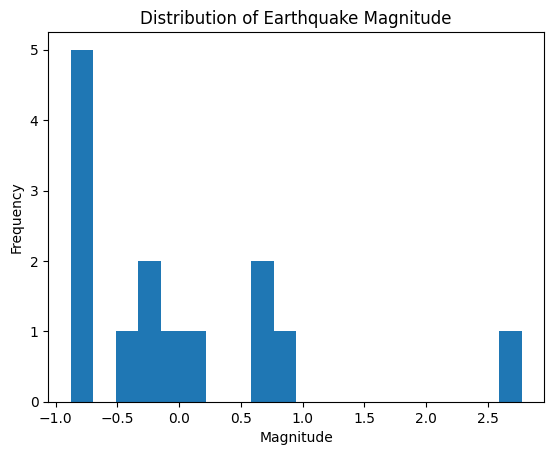

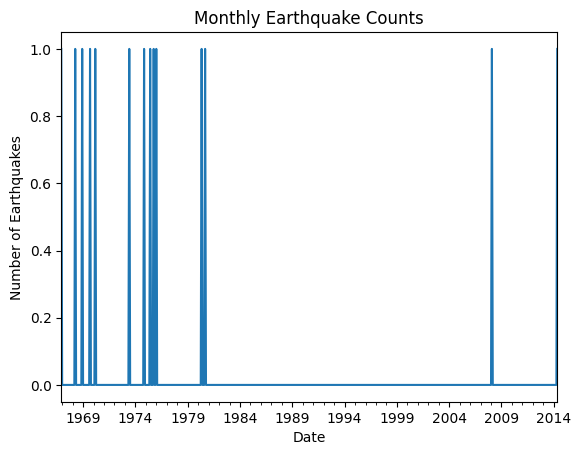

In [6]:
# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Visualize earthquake magnitude distribution
plt.hist(data['Magnitude'], bins=20)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Earthquake Magnitude')
plt.show()

# Explore temporal patterns
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
monthly_counts = data.resample('M').size()
monthly_counts.plot()
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.title('Monthly Earthquake Counts')
plt.show()


Step 4: Feature Engineering (Basic)

In [7]:
# Calculate earthquake density by region
earthquake_density = data['Location Source'].value_counts()
print(earthquake_density)

# Calculate historical seismic activity
data['Historical_Activity'] = data.groupby('Location Source')['Magnitude'].transform('mean')

# Display the updated dataset
print(data.head())


CI    11
UW     1
NN     1
PR     1
Name: Location Source, dtype: int64
                Time   Latitude   Longitude               Type  Depth  \
Date                                                                    
1966-12-20  15:30:01  37.302167 -116.408333  Nuclear Explosion    1.2   
1968-04-26  15:00:02  37.295333 -116.455667  Nuclear Explosion    1.2   
1968-12-19  16:30:01  37.231500 -116.473667  Nuclear Explosion    1.4   
1969-09-16  14:30:01  37.314167 -116.460667  Nuclear Explosion    1.2   
1970-03-26  19:00:01  37.300500 -116.534167  Nuclear Explosion    1.2   

            Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  \
Date                                                                        
1966-12-20        31.61                    16.0  -0.341186             ML   
1968-04-26        31.61                    17.0  -0.287516             ML   
1968-12-19        31.61                    16.0  -0.877882             ML   
1969-09-16        31.61        

Step 5: Model Selection (Basic)

In [8]:
# Import a basic machine learning model
from sklearn.linear_model import LinearRegression

# Split data into features and target
X = data[['Latitude', 'Longitude', 'Depth', 'Historical_Activity']]
y = data['Magnitude']

# Initialize and train a basic model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

Step 6: Documentation

Create a new Markdown cell to document your process, including explanations and any visualizations. Summarize the actions taken in each step and include relevant code snippets and visualizations.

This document can be shared for assessment, providing a clear understanding of the data loading, preprocessing, and initial analysis of your dataset.

Phase 4 : Development part 2

Step 1: Selecting a Machine Learning Algorithm

In this step, we will choose a machine learning algorithm to build our earthquake prediction model. Let's select a Random Forest Regressor as an example.

In [9]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into features and target
X = data[['Latitude', 'Longitude', 'Depth', 'Historical_Activity']]
y = data['Magnitude']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Step 2: Model Training

In this step, we train the selected model on our dataset. The dataset is split into a training set and a testing set, and the Random Forest Regressor is trained on the training set.

Step 3: Model Evaluation

Now, we evaluate the performance of our trained model using appropriate evaluation metrics. For regression tasks like earthquake magnitude prediction, common metrics include Mean Absolute Error (MAE) and Mean Squared Error (MSE).

In [10]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


Mean Absolute Error (MAE): 0.7125539481296163
Mean Squared Error (MSE): 0.7592043755110661


Step 4: Documentation

Create a new Markdown cell to document the model selection, training, and evaluation process. Include explanations of the chosen algorithm, the split of the dataset, and the evaluation metrics used. Also, provide the actual values of MAE and MSE as part of your documentation.

This document can be shared for assessment, providing insights into the model's selection and its performance in predicting earthquake magnitudes.

----------------------

poorani


Nandha college of technology


25.10.2023